<a href="https://colab.research.google.com/github/Carlodna/Prueba-t-cnica-profesional/blob/master/prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 2

La segunda tarea asignada por la VPE consiste en analizar las exportaciones no minero-energéticas (NME), proyectando su comportamiento para el cierre de 2023 y 2024: si aumentarán, se mantendrán estables o disminuirán. Este análisis requiere el uso de la Base de Exportaciones (expo_nme.xlsx) y la aplicación de un modelo predictivo que le permita identificar de la manera más objetiva posible el comportamiento que tendrán las exportaciones NME. Usen datos hasta diciembre de 2022 para entrenamiento y de enero a septiembre de 2023 para validación, midiendo el error cuadrático medio para evaluar la calidad del pronóstico,y luego realicen proyecciones hasta diciembre de 2024.

a. Importar las librerias a utilizar

In [60]:
pip install statsmodels


In [61]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os
##
from sklearn.linear_model import LinearRegression                      ## Modelo lineal.
## Parte estadística.
import statsmodels.formula.api  as smf                                 ## Modelos lineal.
from scipy.stats import shapiro, probplot                              ## libreria estadística de Scipy
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

b. Importar la base de datos


In [63]:
expo_nme="expo_nme.xlsx"
expo=pd.read_excel(expo_nme)
expo

,Mes,Expo_NME
0,2006-01-01,8.101333e+08
1,2006-02-01,9.691270e+08
2,2006-03-01,1.071192e+09
3,2006-04-01,9.296880e+08
4,2006-05-01,1.088814e+09
...,...,...
208,2023-05-01,1.898318e+09
209,2023-06-01,1.704195e+09
210,2023-07-01,1.638097e+09
211,2023-08-01,1.617054e+09


In [64]:
# Ahora veamos algunas estadísticas de nuestros datos
expo.describe()
expo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mes       213 non-null    datetime64[ns]
 1   Expo_NME  213 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


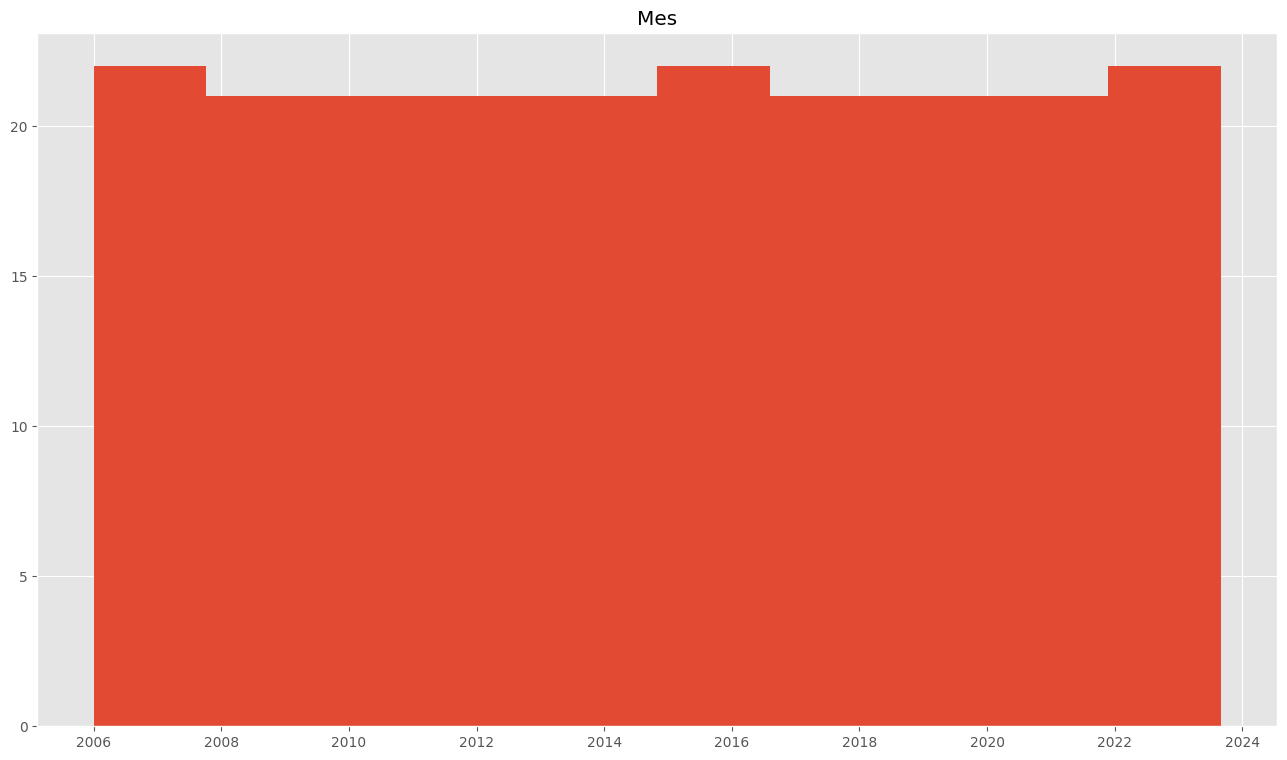

In [65]:
# Visualizamos rápidamente las caraterísticas de entrada
expo.drop(['Expo_NME'],1).hist()
plt.show()

C. Regresion Lineal
Vamos a crear nuestros datos de entrada Expo_NME. Creamos el objeto LinearRegression. Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [66]:
fig = px.scatter(expo, x="Mes", y="Expo_NME", template="plotly_white", title="Scatterplot: Exportaciones")
fig.show()


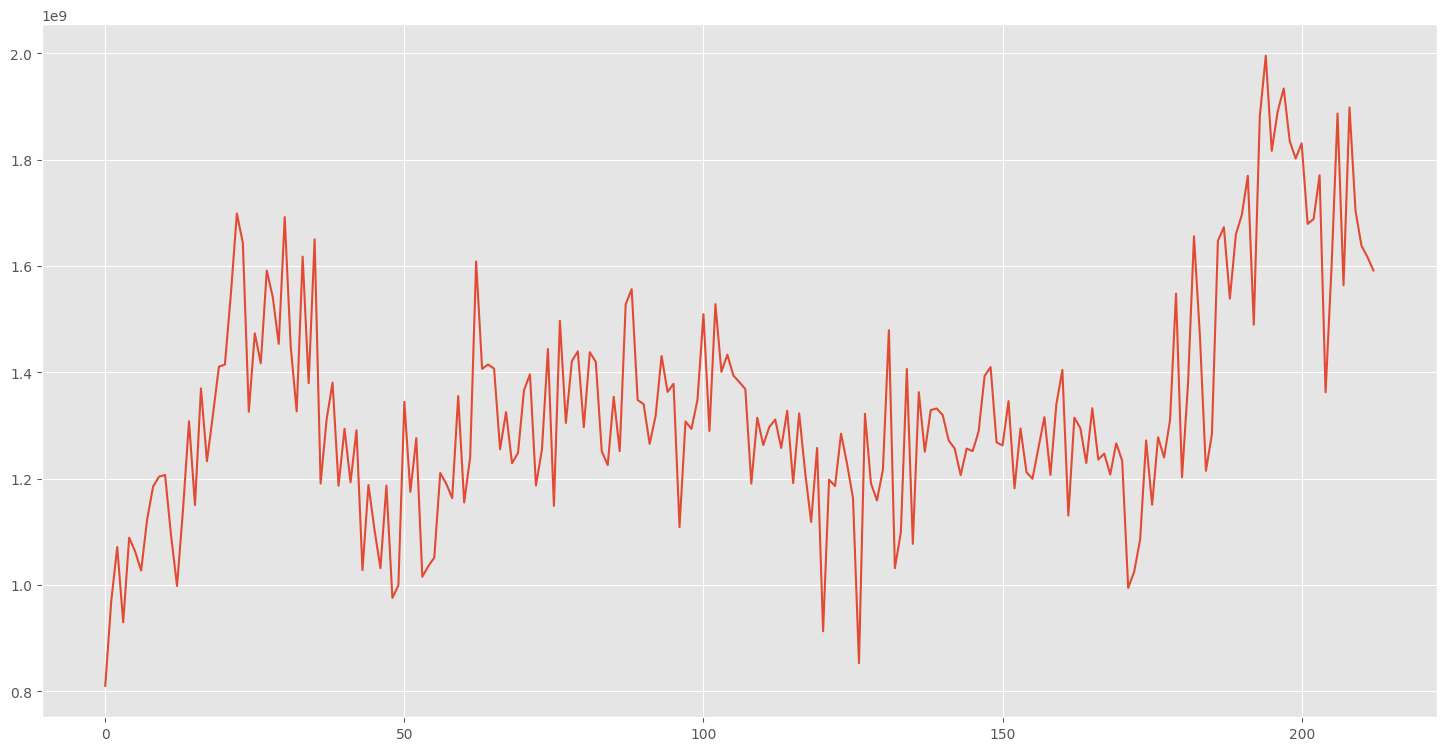

In [67]:
plt.figure(figsize=(18,9))
plt.plot(expo.index, expo['Expo_NME'],linestyle="-")
plt.xlabel=('Mes')
plt.ylabel=('Exportaciones')
plt.show()


In [70]:
auto_arima(expo['Expo_NME'],seasonal=True, m=12, max_p=7, max_d=5, max_q=7, max_P=4, max_D=4, max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  213
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -4271.156
Date:                            Mon, 18 Dec 2023   AIC                           8548.312
Time:                                    16:09:16   BIC                           8558.382
Sample:                                         0   HQIC                          8552.382
                                            - 213                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5798      0.054    -10.647      0.000      -0.687      -0.473
ma.S.L12       0.3184      0.069      4.597      0.000       0.183       0.454
sigma2      1.908e+16   8.69e-19    2.2e+34      0.000    1.91e+16    1.91e+16
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.30   Prob(JB):                         0.29
Heteroskedasticity (H):               0.84   Skew:                             0.20
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.93e+49. Standard errors may be unstable.
"""

In [72]:
train_expo=expo[:len(expo)-12]
test_expo=expo[len(expo)-12:]
test=test_expo.copy()

In [95]:
arima_model=SARIMAX(train_expo['Expo_NME'],order=(0,1,1),seasonal_order=(0,0,1,12))
arima_result=arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Expo_NME   No. Observations:                  201
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -4027.050
Date:                            Mon, 18 Dec 2023   AIC                           8060.100
Time:                                    16:45:53   BIC                           8069.994
Sample:                                         0   HQIC                          8064.104
                                            - 201                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5767      0.054    -10.699      0.000      -0.682      -0.471
ma.S.L12       0.3013      0.068      4.451      0.000       0.169       0.434
sigma2       1.81e+16    8.3e-19   2.18e+34      0.000    1.81e+16    1.81e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 2.92
Prob(Q):                              0.34   Prob(JB):                         0.23
Heteroskedasticity (H):               0.76   Skew:                             0.22
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.71e+49. Standard errors may be unstable.
"""

In [96]:
arima_pred=arima_result.predict(start=len(train_expo),end=len(expo)-1,typ="levels").rename("arima predictions")
arima_pred

201    1.868443e+09
202    1.871138e+09
203    1.871752e+09
204    1.817543e+09
205    1.920719e+09
206    1.929859e+09
207    1.885991e+09
208    1.931469e+09
209    1.941733e+09
210    1.882440e+09
211    1.867296e+09
212    1.891713e+09
Name: arima predictions, dtype: float64

Text(0.5, 1.0, 'Modelo Expo')

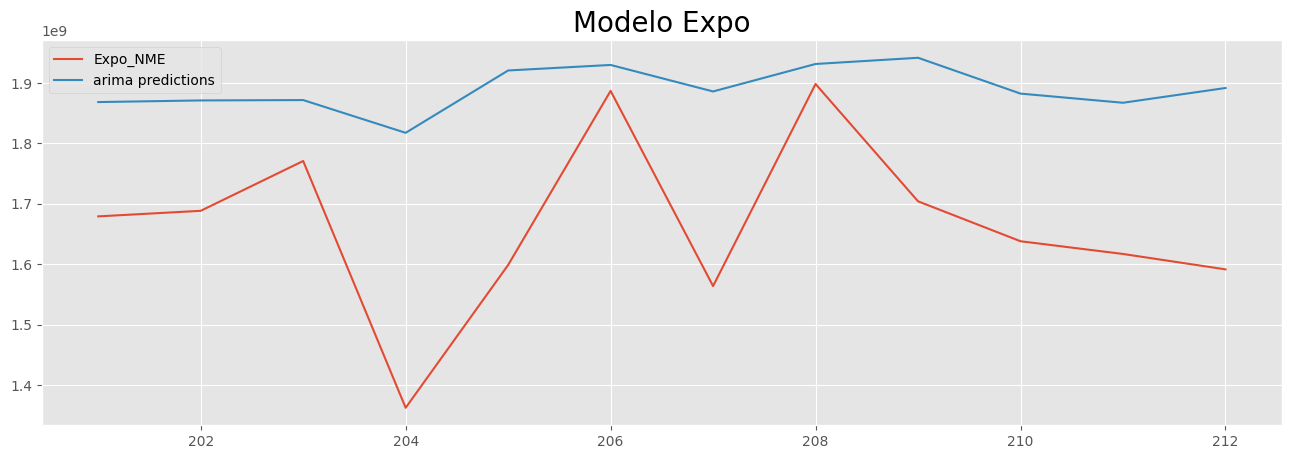

In [97]:
test_expo['Expo_NME'].plot(figsize=(16,5),legend=True)
arima_pred.plot(legend=True);
plt.title("Modelo Expo",fontsize=20)

In [103]:
arima_rmse_error = rmse(test_expo['Expo_NME'],arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = expo['Expo_NME'].mean()
print(f'MSE Error:{arima_mse_error}\nRMSE Error:{arima_rmse_error}\nMean:{mean_value}')

MSE Error:6.37952598284978e+16
RMSE Error:252577235.37266338
Mean:1333884705.306338


In [104]:
test_expo['arima_pred']=arima_pred
arima_pred

201    1.868443e+09
202    1.871138e+09
203    1.871752e+09
204    1.817543e+09
205    1.920719e+09
206    1.929859e+09
207    1.885991e+09
208    1.931469e+09
209    1.941733e+09
210    1.882440e+09
211    1.867296e+09
212    1.891713e+09
Name: arima predictions, dtype: float64